In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [142]:
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc

In [143]:
df = pd.read_csv("./Data/crypto-markets.csv")
df.head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0,1500520000,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0,1491160000,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0,1597780000,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0,1542820000,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0,1292190000,0.3881,33.32


In [144]:
# printng the latest currency
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')
latest = df[df['date'] == max(df['date'])]
latest.head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
1744,bitcoin,BTC,Bitcoin,2018-02-05,1,8270.540000,8364.840000,6756.680000,6955.270000,9285290000,139325000000,0.1235,1608.16
2658,ethereum,ETH,Ethereum,2018-02-05,2,834.960000,856.650000,644.600000,697.950000,4269530000,81337400000,0.2516,212.05
4305,ripple,XRP,Ripple,2018-02-05,3,0.825943,0.833866,0.675827,0.691799,1286180000,32219400000,0.1011,0.16
4503,bitcoin-cash,BCH,Bitcoin Cash,2018-02-05,4,1159.890000,1172.700000,839.950000,887.410000,568117000,19659800000,0.1426,332.75
4631,cardano,ADA,Cardano,2018-02-05,5,0.385044,0.399523,0.319646,0.327371,658548000,9983060000,0.0967,0.08


In [145]:
# listing the number of cryptos listed
latest['symbol'].nunique()

1461

In [146]:
#listing the top 10 cryptos

latest[latest['ranknow'] <= 10].groupby('ranknow').name.unique()
latest = latest[['name', 'market', 'volume']].head(10)
latest.head()

,name,market,volume
1744,Bitcoin,139325000000,9285290000
2658,Ethereum,81337400000,4269530000
4305,Ripple,32219400000,1286180000
4503,Bitcoin Cash,19659800000,568117000
4631,Cardano,9983060000,658548000


In [147]:
# now creating a fucntion to plot and compare
import matplotlib.pyplot as plt

def plot(x,y, label):
    fig = plt.figure(figsize = (10,5))
    plt.barh(x, y, color = 'lightblue')
    plt.title("Top 10 Crypto Market Values")
    plt.xlabel(label)
    plt.ylabel("Cryptocurrencies")
    plt.show()

#### Finding Market value of crypto

Obtained by multiplying the circulating supply of coins by the current coin price

In [148]:
currency = []
market_value =[]
for i in latest['name']:
    currency.append(i)
for m in latest['market']:
    market_value.append(m)

In [149]:
currency, market_value

(['Bitcoin',
  'Ethereum',
  'Ripple',
  'Bitcoin Cash',
  'Cardano',
  'Litecoin',
  'NEO',
  'Stellar',
  'EOS',
  'NEM'],
 [139325000000,
  81337400000,
  32219400000,
  19659800000,
  9983060000,
  8190580000,
  6992380000,
  7064590000,
  5618380000,
  4940820000])

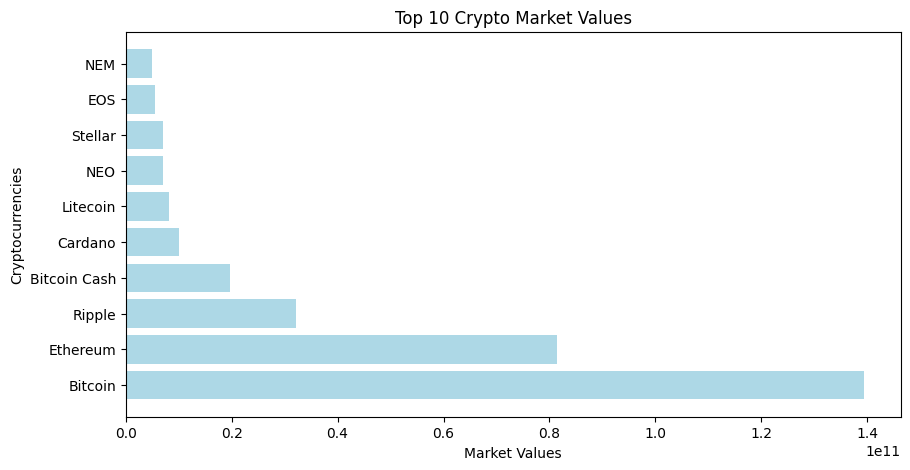

In [150]:
plot(currency, market_value, "Market Values")

#### Volume

A measure of how much of a given financial asset has been traded in a given period of time

In [151]:
volume = []
for v in latest['volume']:
    volume.append(v)
volume

[9285290000,
 4269530000,
 1286180000,
 568117000,
 658548000,
 844678000,
 312096000,
 339507000,
 640159000,
 28590400]

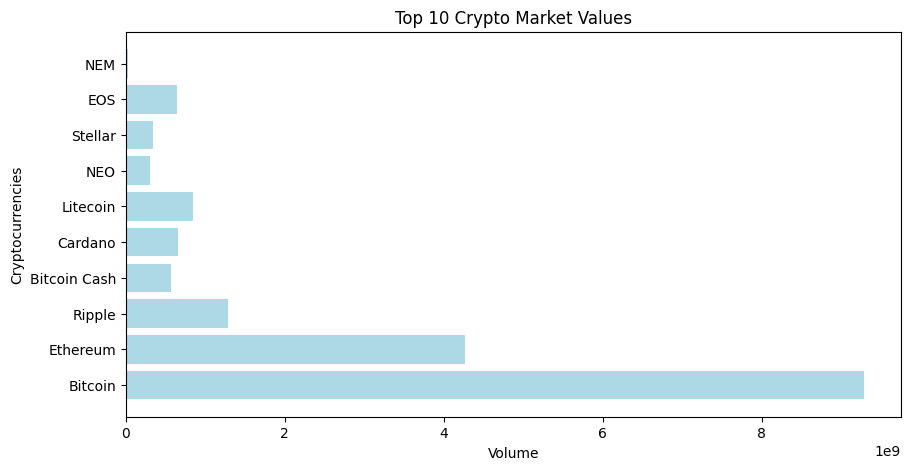

In [152]:
plot(currency,volume, "Volume")